# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 500) 

# Dataset

In [2]:
df = pd.read_csv('./xapi.csv')
df

,gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


# Exploration and Visualization

## Data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   Nationality               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisitedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

## Missing Values

In [4]:
print(df.isnull().sum())

gender                      0
Nationality                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisitedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [5]:
df['Class'].unique()

array(['M', 'L', 'H'], dtype=object)

## Distributions

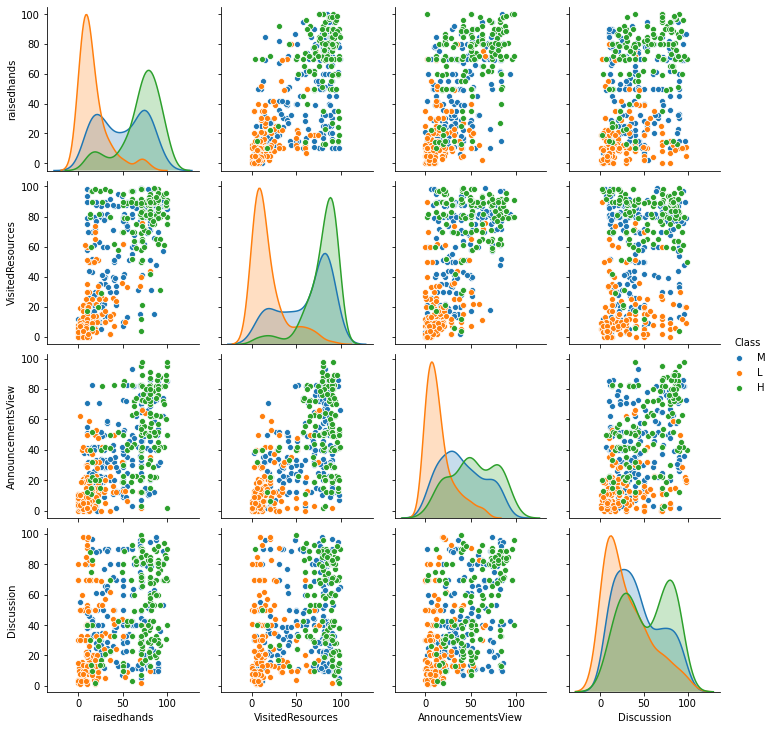

In [6]:
sns.pairplot(df, hue='Class')

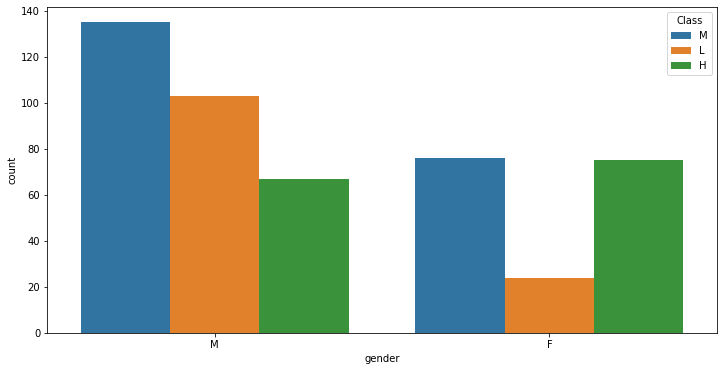

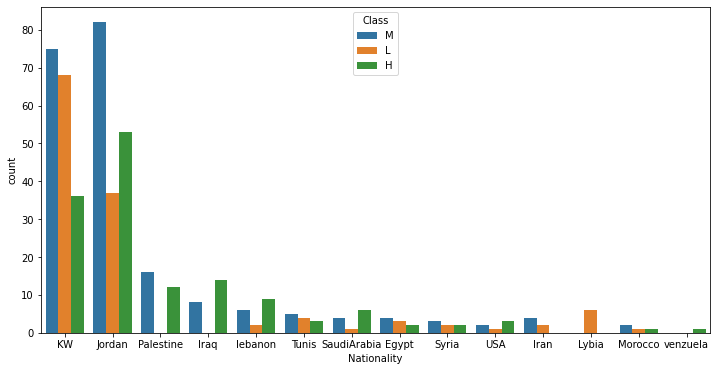

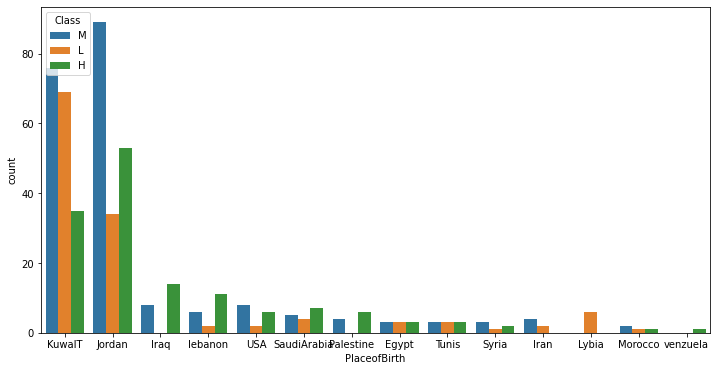

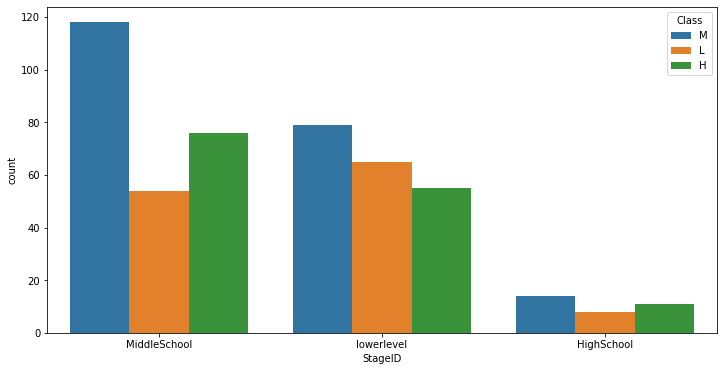

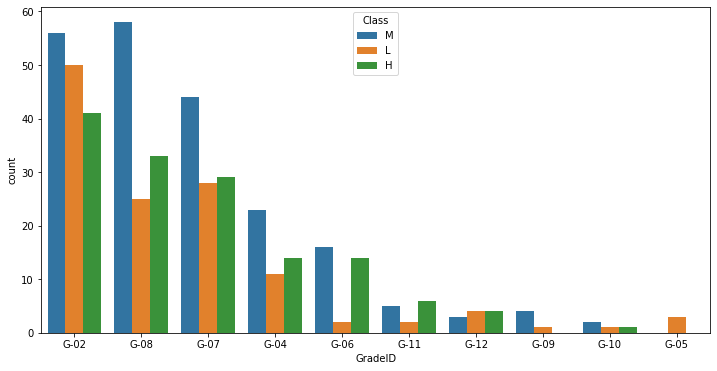

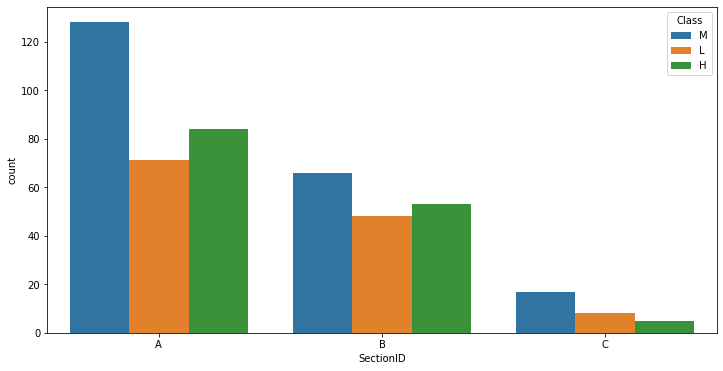

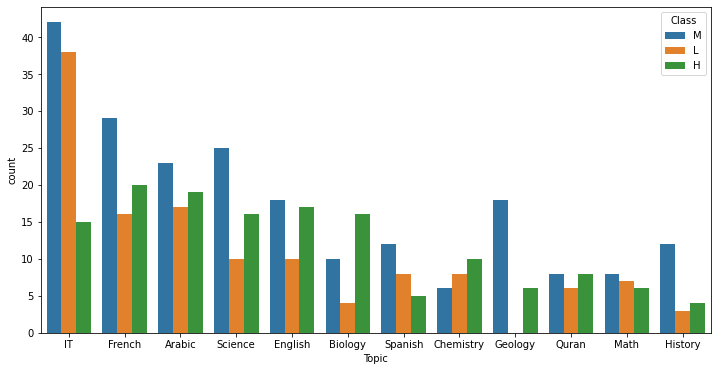

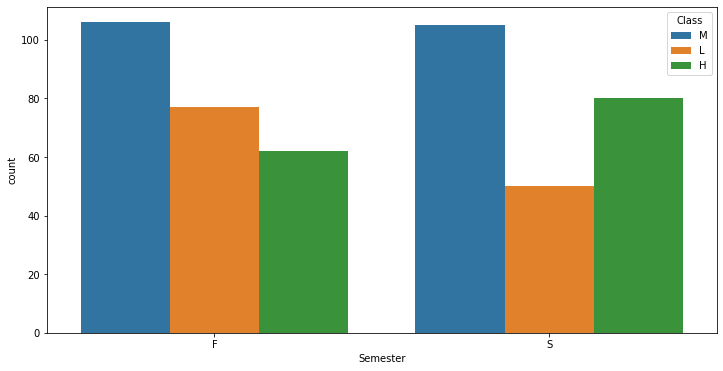

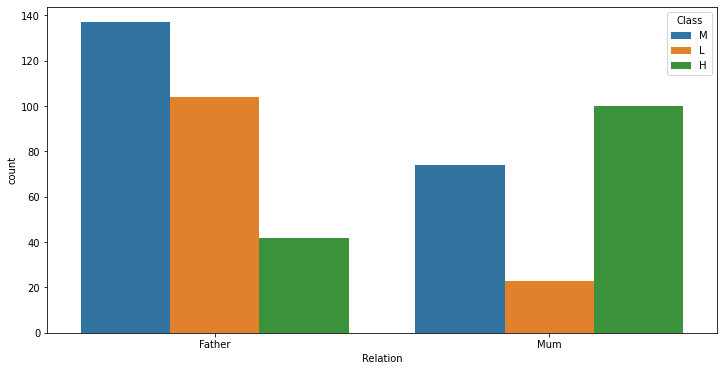

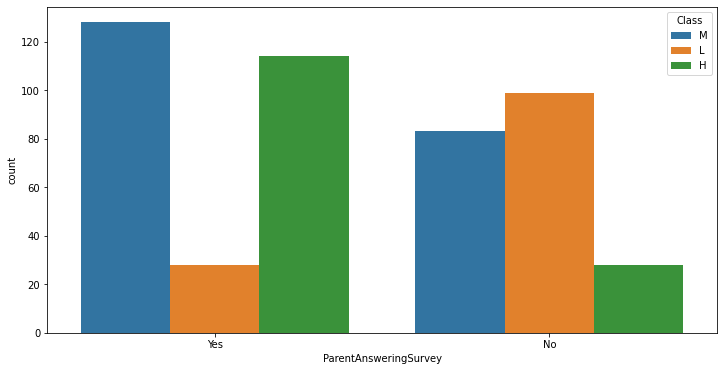

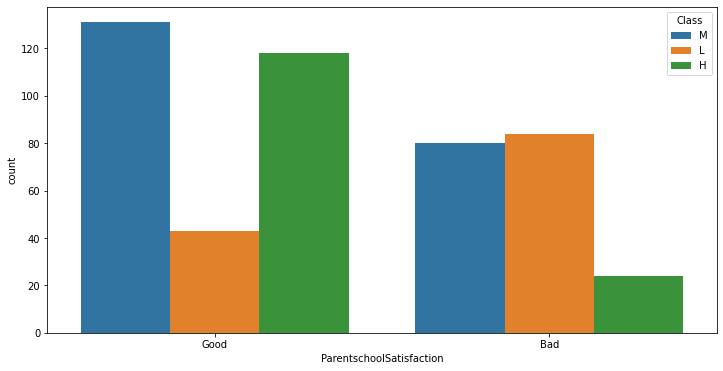

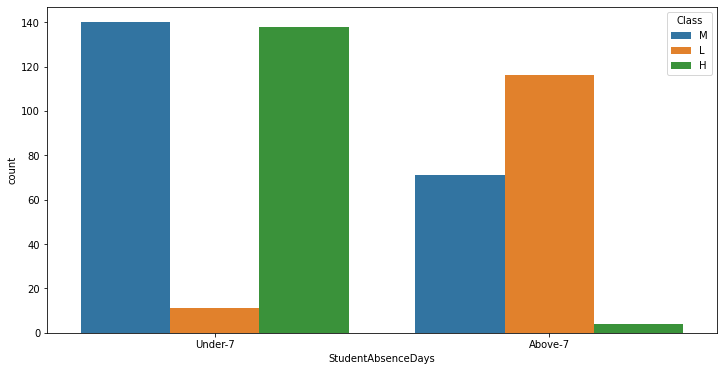

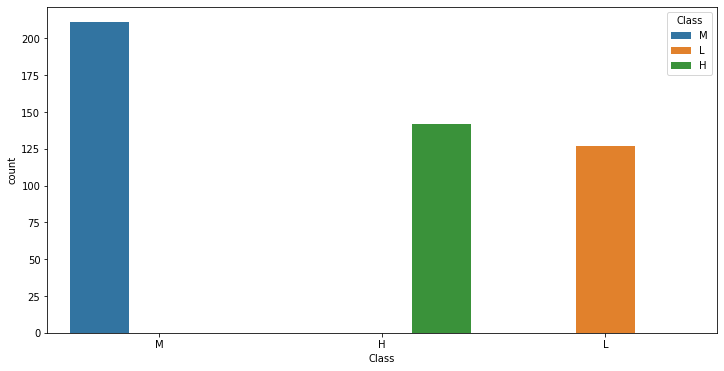

In [7]:
for col in df.columns:
    if df[col].dtype == np.object:
        descending_order = df[col].value_counts().sort_values(ascending=False).index
        plt.figure(figsize=(12,6))
        sns.countplot(data=df,x=df[col], hue="Class", order=descending_order)
        plt.show()

## Encoding

Notice that most values are not numeric.
However, they can be encoded in a more informative way than dummy encoding.

In [8]:
old_df = df.copy()

In [9]:
df['Relation'].value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

In [10]:
df = old_df.copy()

df['Class'] = df['Class'].map({'L':0, 'M':1, 'H': 2})
df['gender'] = df['gender'].map({'M': 0, 'F': 1})
# df['Nationality'] = df['Nationality'].map()
df['StageID'] = df['StageID'].map({'lowerlevel': 0, 'MiddleSchool': 1, 'HighSchool': 2})
df['GradeID'] = df['GradeID'].map(lambda x: int(x.replace('G-', '')))
df['Semester'] = df['Semester'].map({'F': 1, 'S': 2})
df['ParentAnsweringSurvey'] = df['ParentAnsweringSurvey'].map({'Yes': 1, 'No': 0})
df['ParentschoolSatisfaction'] = df['ParentschoolSatisfaction'].map({'Good': 1, 'Bad': 0})
df['StudentAbsenceDays'] = df['StudentAbsenceDays'].map({'Under-7': 0, 'Above-7': 1})
df['Relation'] = df['Relation'].map({'Father': 0, 'Mum': 1})

df.drop(['Nationality', 'PlaceofBirth', 'SectionID', 'Topic'], axis=1, inplace=True)
df

,gender,StageID,GradeID,Semester,Relation,raisedhands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,0,4,1,0,15,16,2,20,1,1,0,1
1,0,0,4,1,0,20,20,3,25,1,1,0,1
2,0,0,4,1,0,10,7,0,30,0,0,1,0
3,0,0,4,1,0,30,25,5,35,0,0,1,0
4,0,0,4,1,0,40,50,12,50,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,1,8,2,0,5,4,5,8,0,0,1,0
476,1,1,8,1,0,50,77,14,28,0,0,0,1
477,1,1,8,2,0,55,74,25,29,0,0,0,1
478,1,1,8,1,0,30,17,14,57,0,0,1,0


In [11]:
dict(df['ParentschoolSatisfaction'].value_counts()/len(df))

{1: 0.6083333333333333, 0: 0.39166666666666666}

## Feature Correlation Heatmap

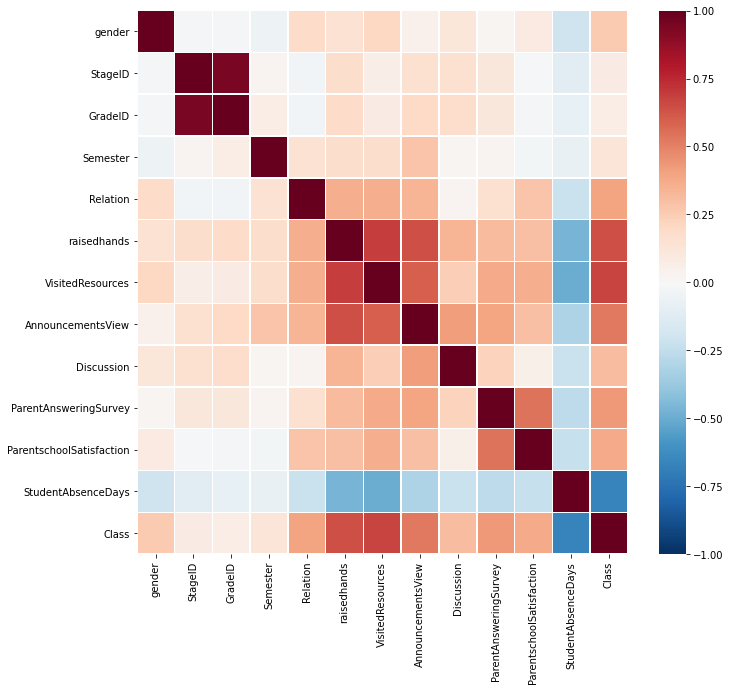

In [12]:
f, ax = plt.subplots(figsize=(11, 10))
sns.heatmap(pd.get_dummies(df).corr(), fmt="f", cmap='RdBu_r', linewidths=.5, ax=ax, vmin=-1, vmax=1)

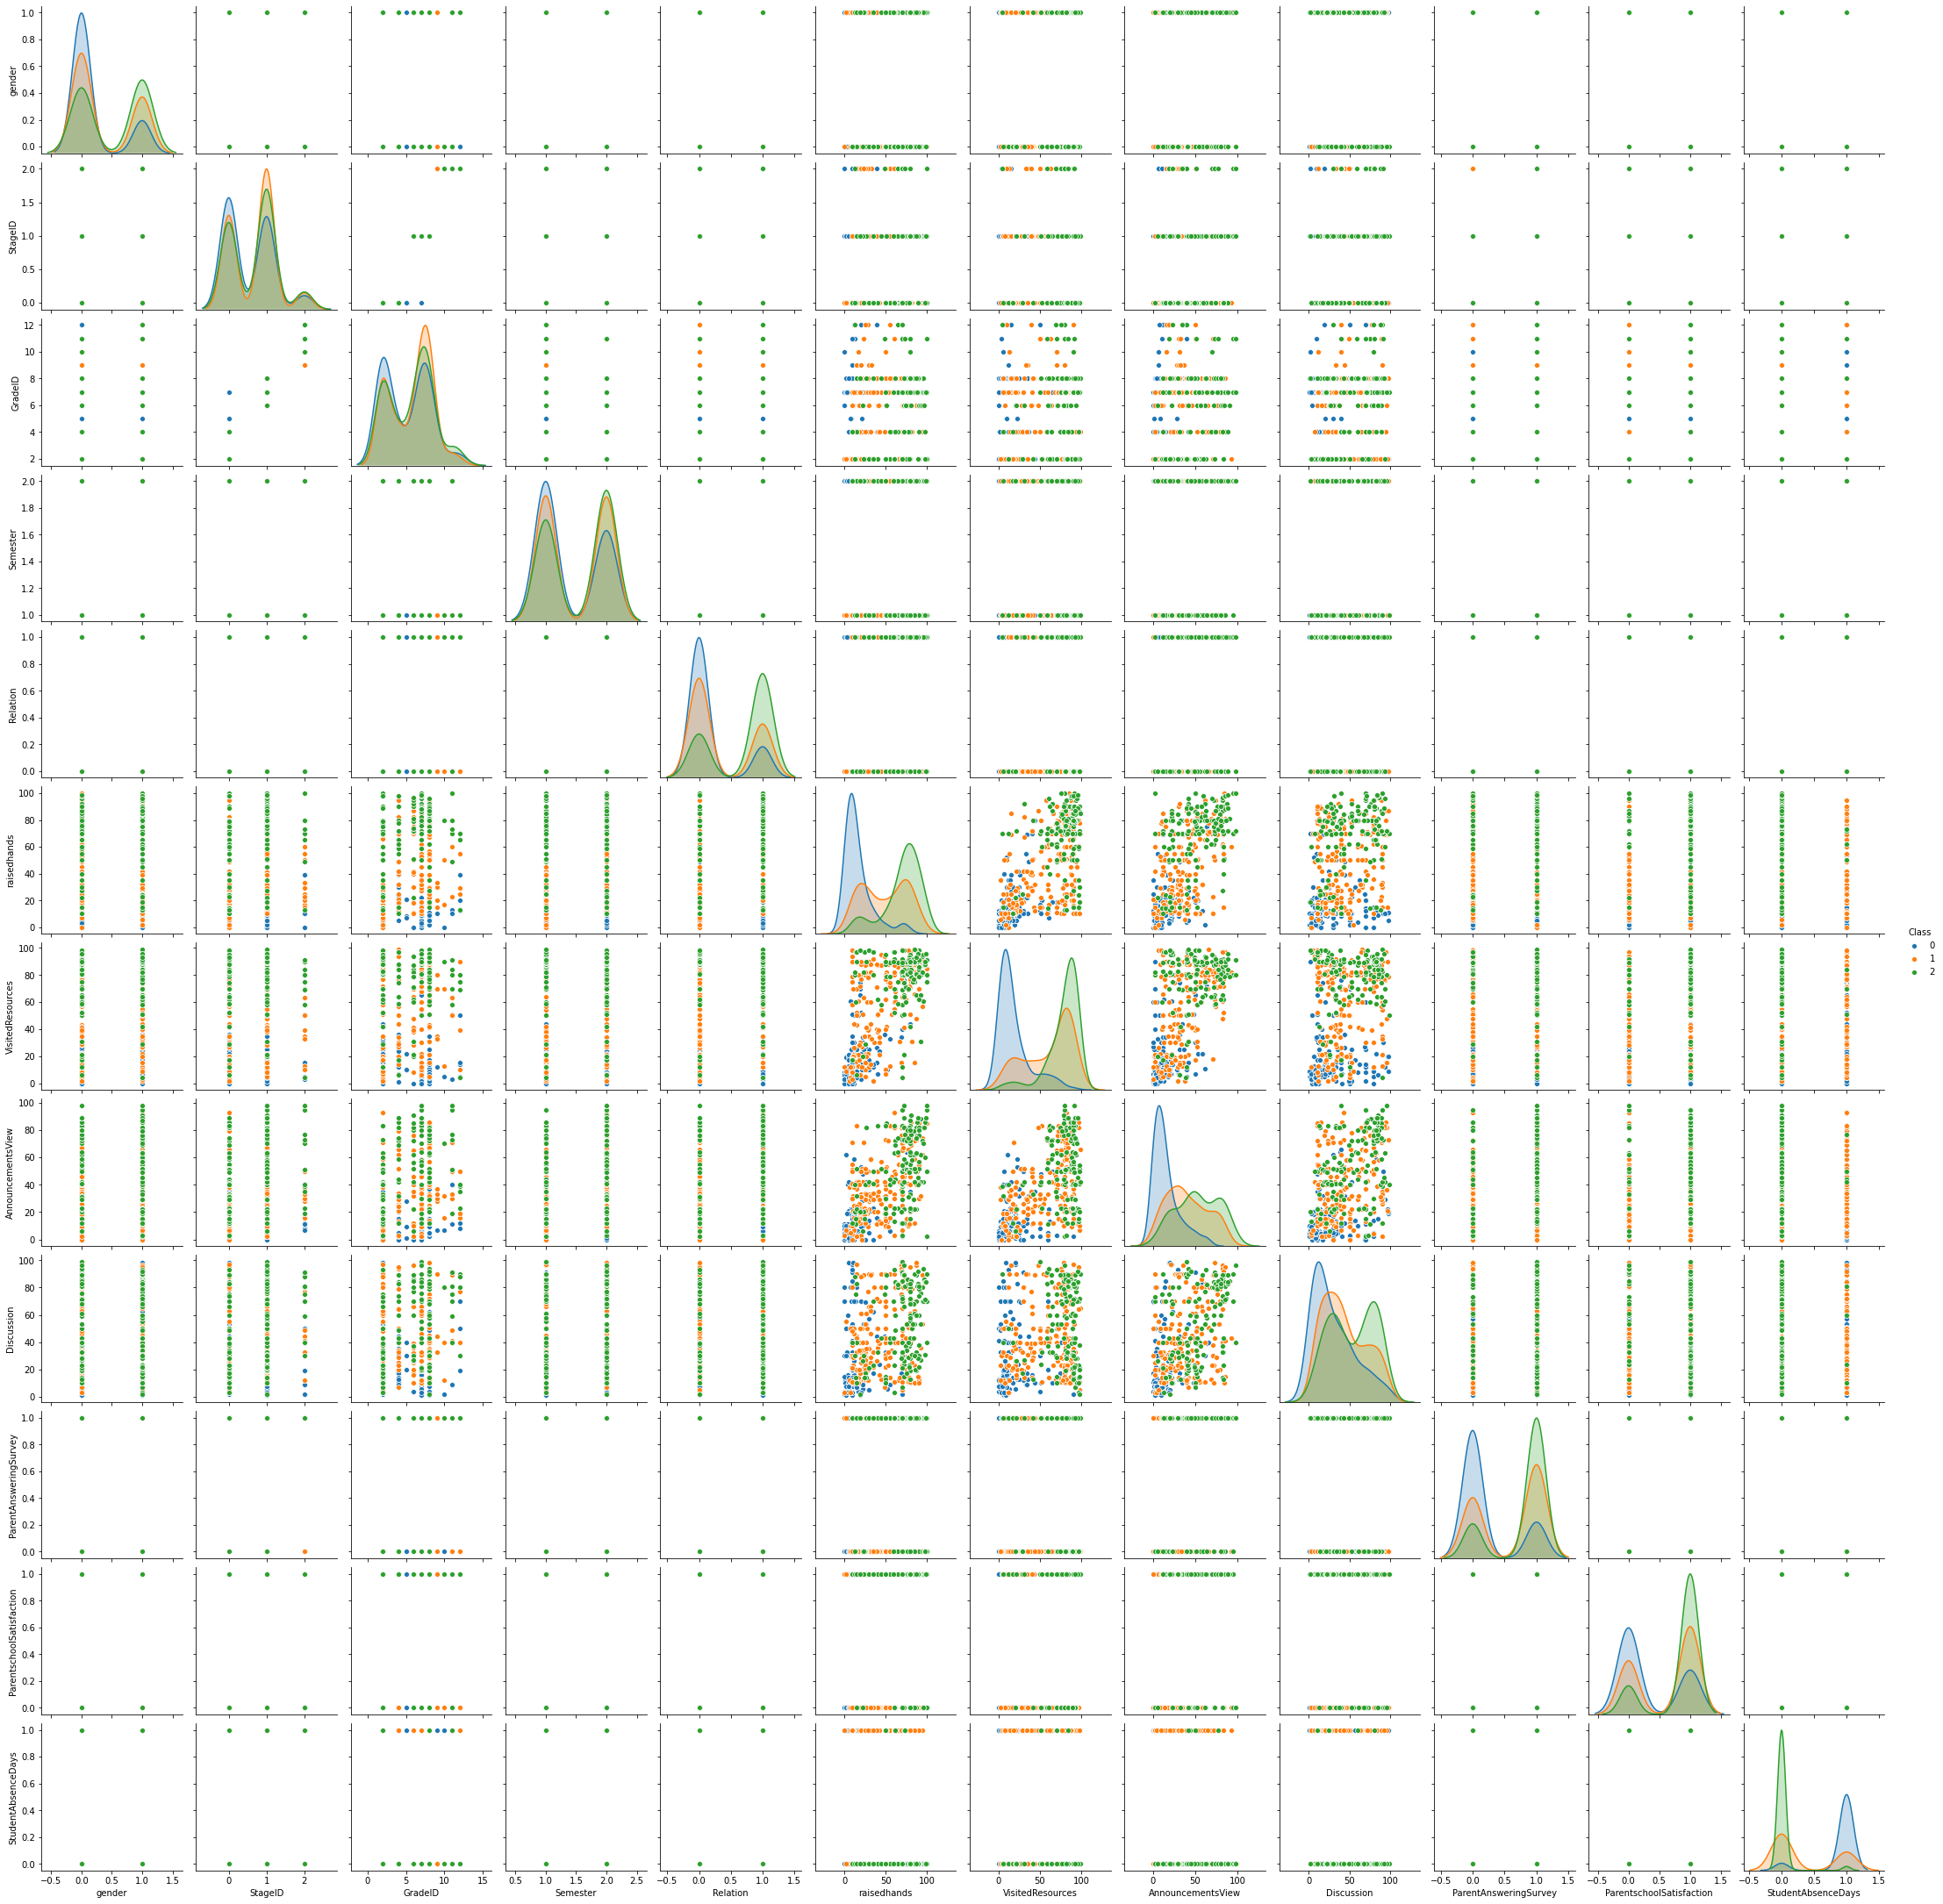

In [13]:
sns.pairplot(df, hue='Class')

# Baseline Results

## Train-Test Split

In [45]:
from sklearn.model_selection import train_test_split

# restore dataset to before visualization
# df = old_df.copy()

# separate features from label
X = df.drop('Class', axis=1)
y = df['Class']

# convert class to numeric for prediction
# y = y.map({'Best': 5, 'Vg': 4, 'Good': 3, 'Pass': 2, 'Fail': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('Training:', X_train.shape, 'Testing:',  X_test.shape)
y

Training: (336, 12) Testing: (144, 12)


0      1
1      1
2      0
3      0
4      1
      ..
475    0
476    1
477    1
478    0
479    0
Name: Class, Length: 480, dtype: int64

## Classification

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


algorithms = {
    'NB': GaussianNB(),
    'LR': LogisticRegression(),
    'DT': DecisionTreeClassifier(max_depth=4),
    'RF': RandomForestClassifier(),
}

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

average_scores_split = {}
algorithms_copy = dict(algorithms)
for name, algo in algorithms_copy.items():
    print(algo, '\n\n\n')
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    print(confusion_matrix(y_test, y_pred), '\n\n\n')
    print(classification_report(y_test, y_pred), '\n\n\n')
    res = classification_report(y_test, y_pred, output_dict=True)
    average_scores_split[name] = {'accuracy': res['accuracy'], 'precision': res['macro avg']['precision'], 'recall': res['macro avg']['recall'], 'f1-score': res['macro avg']['f1-score']}
split_avg_scores = pd.DataFrame(average_scores_split).transpose()

GaussianNB(priors=None, var_smoothing=1e-09) 



[[33  2  1]
 [ 6 43 16]
 [ 0  9 34]] 



              precision    recall  f1-score   support

           0       0.85      0.92      0.88        36
           1       0.80      0.66      0.72        65
           2       0.67      0.79      0.72        43

    accuracy                           0.76       144
   macro avg       0.77      0.79      0.78       144
weighted avg       0.77      0.76      0.76       144
 



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



[[31  4  1]
 [ 7 42 16]
 [ 1 14 28]] 



              precision    recall  f1-score   support

           0       0.79      0.86      0.83        36
           1       0.70      0.65      0.67  

/home/alex-d/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Visualization

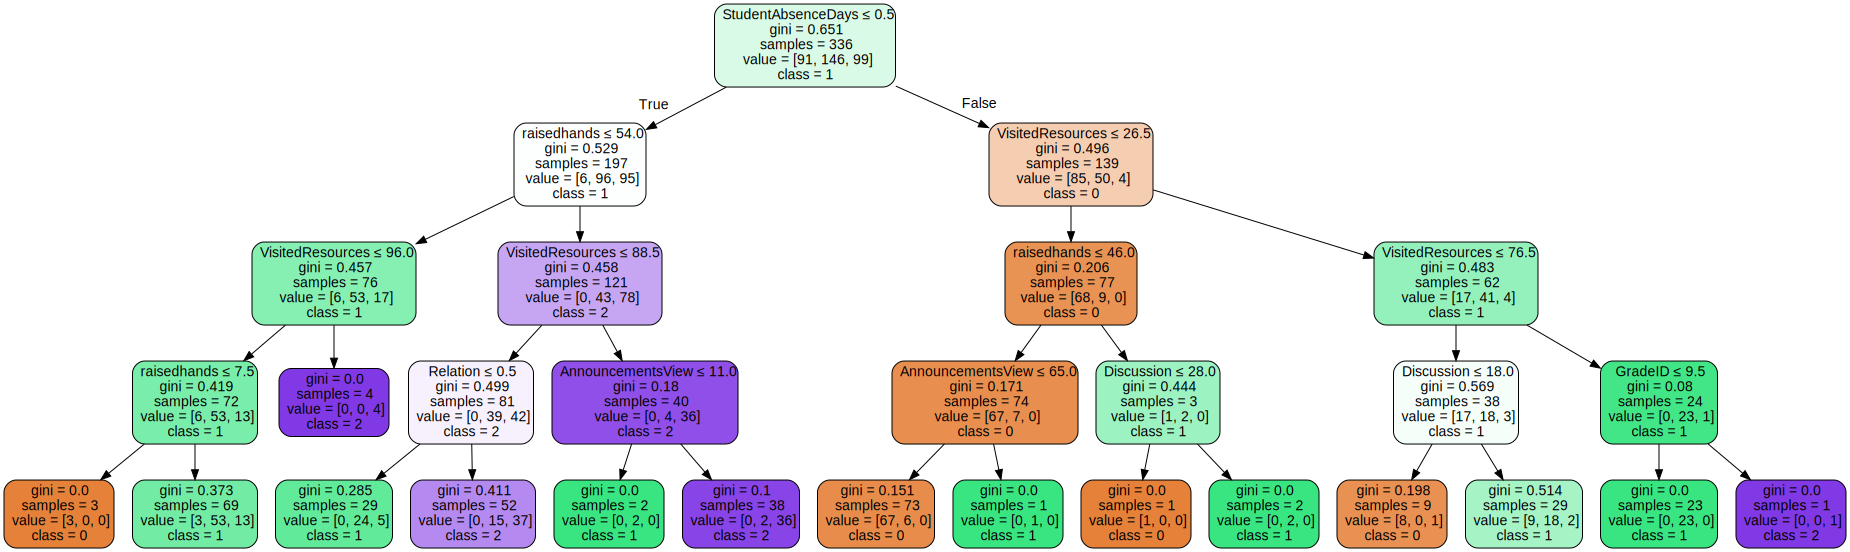

In [54]:
import graphviz
from sklearn import tree


dot_data = tree.export_graphviz(algorithms_copy['DT'], out_file=None,
    feature_names=X.columns,
    class_names=['0','1','2'],
    filled=True, rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)
graph


## 5-fold Cross Validation

In [56]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer

scorers = {
    **{'precision_' + str(i): make_scorer(precision_score, average = None, labels = [i], zero_division=0) for i in range(3)},
    'precision_average': make_scorer(precision_score, average='macro', zero_division=0),
    **{'recall_' + str(i): make_scorer(recall_score, average = None, labels = [i], zero_division=0) for i in range(3)},
    'recall_average': make_scorer(recall_score, average='macro', zero_division=0),
    **{'f1_score_' + str(i): make_scorer(f1_score, average = None, labels = [i], zero_division=0) for i in range(3)},
    'f1_average': make_scorer(f1_score, average='macro'),
    'accuracy': make_scorer(accuracy_score)
}

average_scores = {}
for name, algo in dict(algorithms).items():
    res = cross_validate(algo, X, y, cv=5, scoring=scorers, n_jobs=-1)
    res = {k: v.mean() for k, v in res.items()}
    labels = list(range(3))
    res_df_dict = {'label': labels, 'precision': [res['test_precision_' + str(i)] for i in labels], 'recall': [res['test_recall_' + str(i)] for i in labels], 'f1_score': [res['test_f1_score_' + str(i)] for i in labels]}
    res_df = pd.DataFrame(res_df_dict)
    print('\n\n', algo, '\n\n')
    print(res_df)
    print('\nAccuracy:', res['test_accuracy'])
    print('Average Precision:', res['test_precision_average'])
    print('Average Recall:', res['test_recall_average'])
    print('Average F1-scoree:', res['test_f1_average'])
    average_scores['CV_' + name] = {'accuracy': res['test_accuracy'], 'precision': res['test_precision_average'], 'recall': res['test_recall_average'], 'f1-score': res['test_f1_average']}
cv_avg_scores = pd.DataFrame(average_scores).transpose()



 GaussianNB(priors=None, var_smoothing=1e-09) 


   label  precision    recall  f1_score
0      0   0.798929  0.805231  0.782805
1      1   0.693548  0.583610  0.624955
2      2   0.667113  0.766256  0.708029

Accuracy: 0.6958333333333333
Average Precision: 0.7198631001820657
Average Recall: 0.7183657050425294
Average F1-scoree: 0.7052631574914303


 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 


   label  precision    recall  f1_score
0      0   0.806120  0.851077  0.816088
1      1   0.736969  0.645404  0.672261
2      2   0.687362  0.731773  0.700889

Accuracy: 0.725
Average Precision: 0.7434834471687248
Average Recall: 0.7427515100955357
Average F1-scoree: 0.7297461956940304


 DecisionTreeClassifier(cc

## Comparison

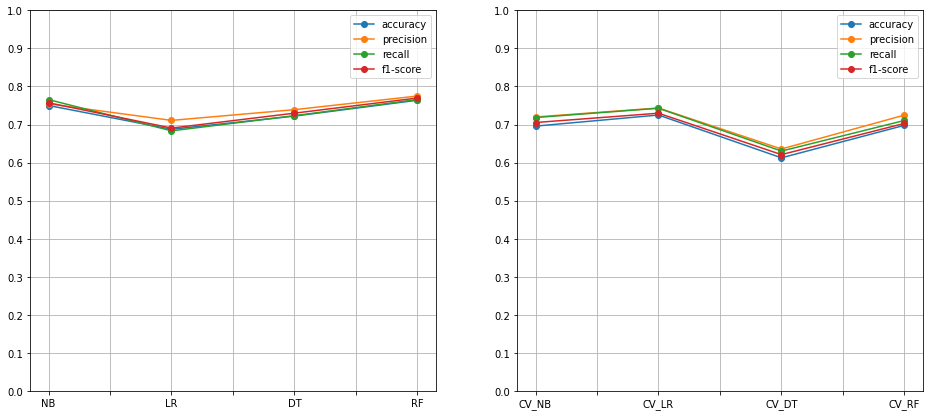

In [19]:
f, ax = plt.subplots(1,2, figsize=(16, 7))
combined_scores = split_avg_scores.append(cv_avg_scores)
plt.setp(ax, ylim=(0,1), yticks=[i/10 for i in range(11)])

split_avg_scores.plot(ax=ax[0], marker='o', grid=True)
cv_avg_scores.plot(ax=ax[1], marker='o', grid=True)

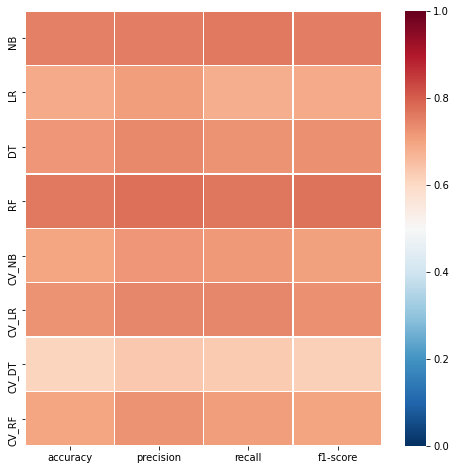

In [20]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(combined_scores, fmt="f", cmap='RdBu_r', linewidths=.5, ax=ax, vmin=0, vmax=1)

# Feature Selection

## Feature Importance - RandomForest

<BarContainer object of 12 artists>

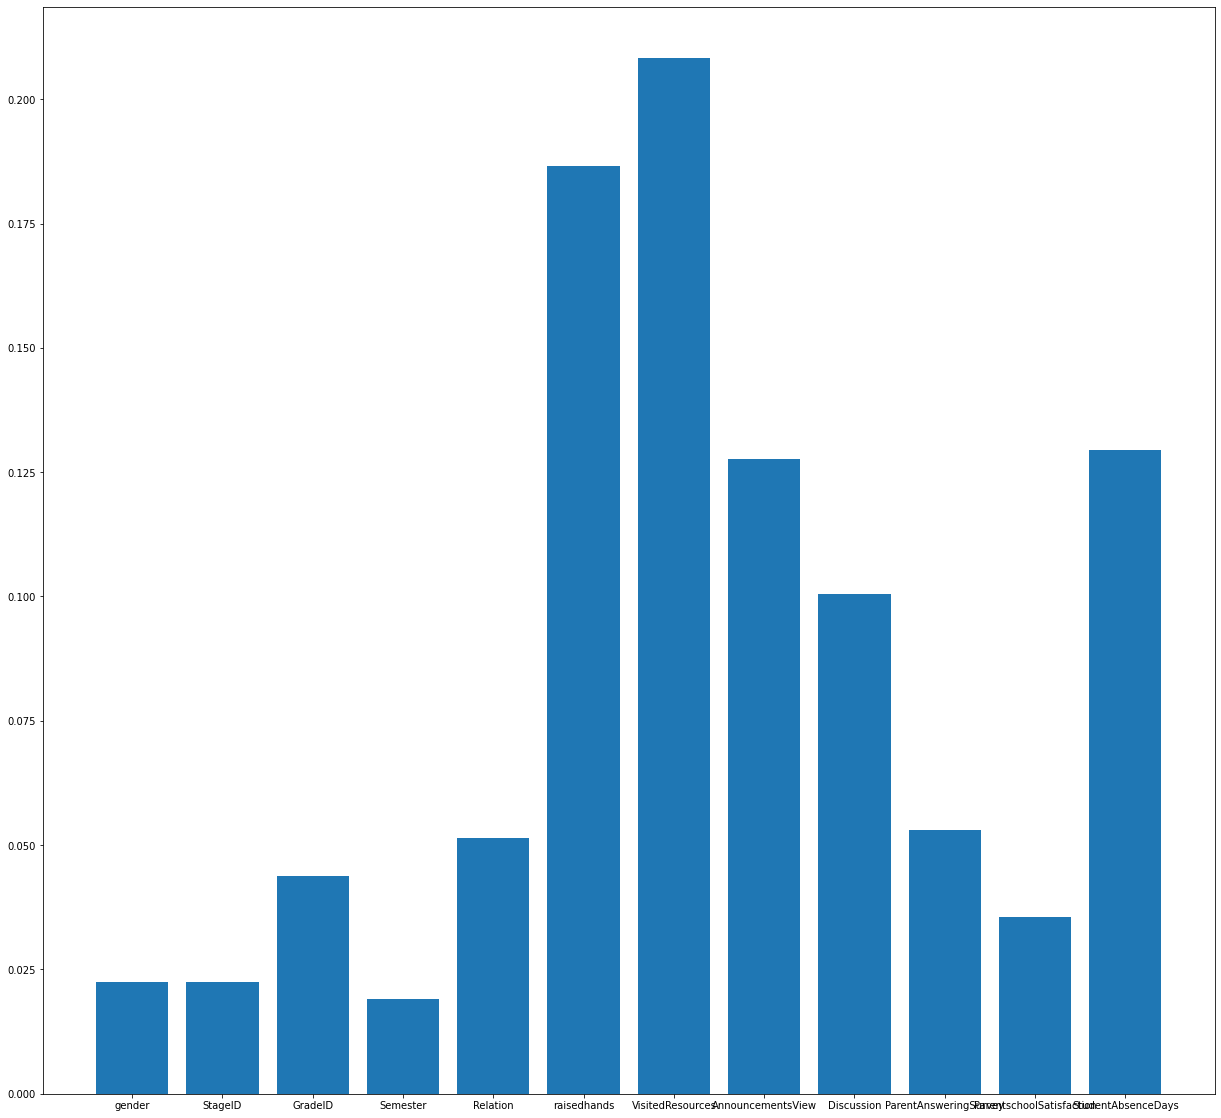

In [58]:
plt.figure(figsize=(21,20))
importances = algorithms_copy['RF'].feature_importances_
plt.bar([x for x in range(len(importances))], importances, tick_label=X.columns)

## Feature Importance - DecisionTree

<BarContainer object of 12 artists>

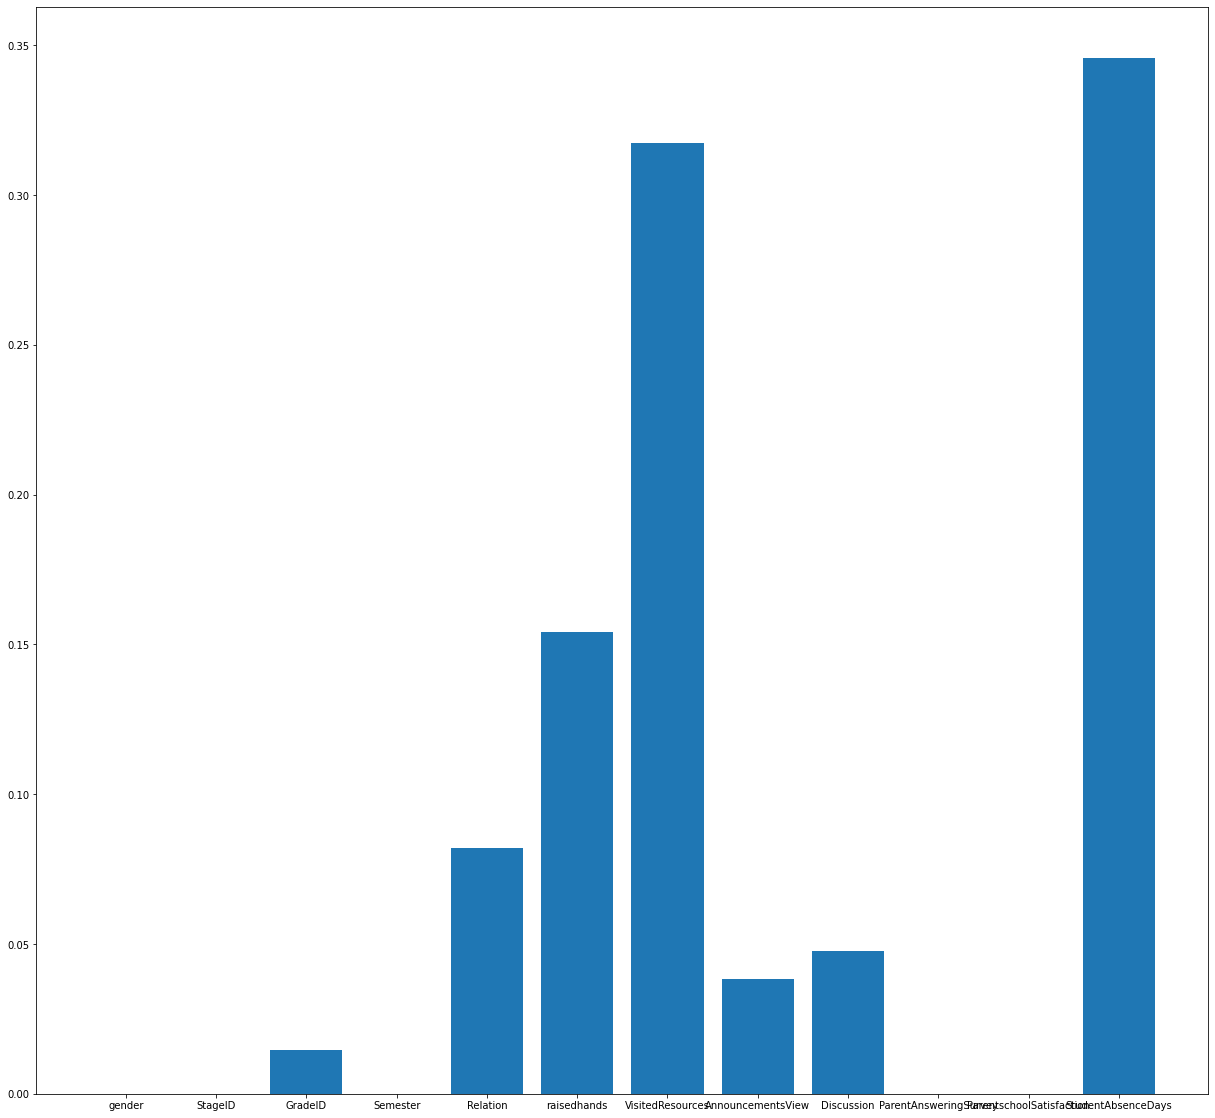

In [61]:
plt.figure(figsize=(21,20))
importances = algorithms_copy['DT'].feature_importances_
plt.bar([x for x in range(len(importances))], importances, tick_label=X.columns)

In [62]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

fs_scores_split = {}
algorithms_copy = dict(algorithms)
X_new = SelectKBest(mutual_info_classif, k=10).fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3)
for name, algo in algorithms_copy.items():
    print(algo, '\n\n\n')    
    print(X_train.shape)
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    print(confusion_matrix(y_test, y_pred), '\n\n\n')
    print(classification_report(y_test, y_pred), '\n\n\n')
    res = classification_report(y_test, y_pred, output_dict=True)
    fs_scores_split['FS_' + name] = {'accuracy': res['accuracy'], 'precision': res['macro avg']['precision'], 'recall': res['macro avg']['recall'], 'f1-score': res['macro avg']['f1-score']}
fs = pd.DataFrame(fs_scores_split).transpose()

GaussianNB(priors=None, var_smoothing=1e-09) 



(336, 10)
[[32  5  0]
 [ 8 42 11]
 [ 0  5 41]] 



              precision    recall  f1-score   support

           0       0.80      0.86      0.83        37
           1       0.81      0.69      0.74        61
           2       0.79      0.89      0.84        46

    accuracy                           0.80       144
   macro avg       0.80      0.81      0.80       144
weighted avg       0.80      0.80      0.80       144
 



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



(336, 10)
[[34  3  0]
 [ 6 45 10]
 [ 0 12 34]] 



              precision    recall  f1-score   support

           0       0.85      0.92      0.88        37
           1       0.75  

/home/alex-d/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
fs

,accuracy,precision,recall,f1-score
FS_NB,0.770833,0.780886,0.774980,0.777151
FS_LR,0.763889,0.771130,0.771130,0.771130
FS_DT,0.743056,0.745716,0.755257,0.749930
FS_RF,0.763889,0.778915,0.763747,0.769405
